<a href="https://colab.research.google.com/github/syno3/Data-science-portfolio/blob/main/supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing modules needed

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [4]:
data = pd.read_csv('sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Checking for null values

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Check for columns in the dataset

In [8]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### Check the dataset info

In [11]:
data.info

<bound method DataFrame.info of       Invoice ID Branch  ... gross income Rating
0    750-67-8428      A  ...      26.1415    9.1
1    226-31-3081      C  ...       3.8200    9.6
2    631-41-3108      A  ...      16.2155    7.4
3    123-19-1176      A  ...      23.2880    8.4
4    373-73-7910      A  ...      30.2085    5.3
..           ...    ...  ...          ...    ...
995  233-67-5758      C  ...       2.0175    6.2
996  303-96-2227      B  ...      48.6900    4.4
997  727-02-1313      A  ...       1.5920    7.7
998  347-56-2442      A  ...       3.2910    4.1
999  849-09-3807      A  ...      30.9190    6.6

[1000 rows x 17 columns]>

### Group by city and plot total

In [18]:
city = data.groupby("City")["Total"].sum()
city

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

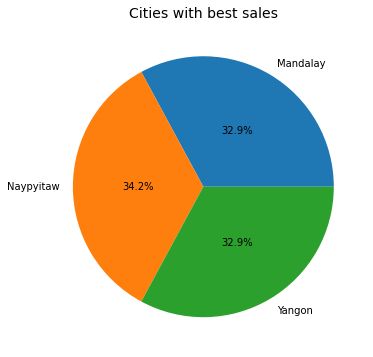

In [24]:
pie, ax = plt.subplots(figsize=[10,6])
labels = city.keys()
plt.pie(x=city, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Cities with best sales", fontsize=14);

### Group by gender and plot total

In [27]:
Gender = data.groupby("Gender")["Total"].sum()
Gender

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

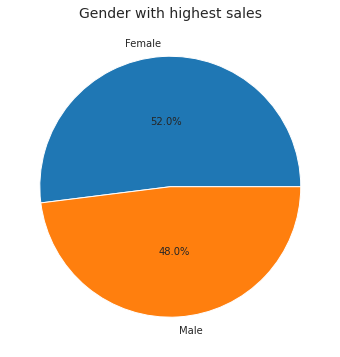

In [29]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Gender.keys()
plt.pie(x=Gender, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Gender with highest sales", fontsize=14);

### Total quantity sold during period

In [31]:
data['Quantity'].sum()

5510

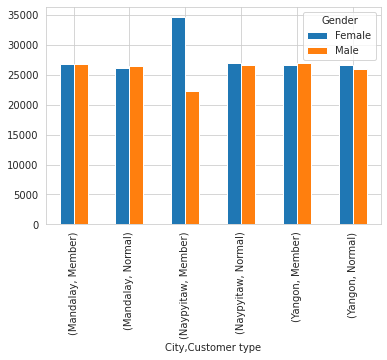

In [34]:
data.groupby(["City","Customer type","Gender"])["Total"].agg("sum").unstack().plot(kind="bar")

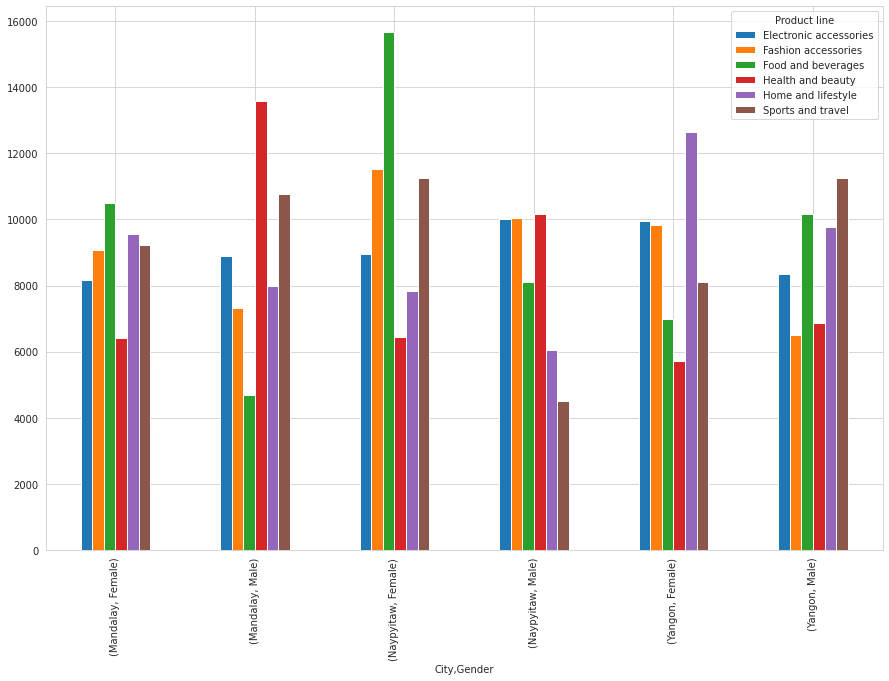

In [36]:
data.groupby(["City","Gender","Product line"])["Total"].agg("sum").unstack().plot(kind="bar",figsize=(15,10))